# 클러스터 알고리즘

## iris 데이터셋 불러오기

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.2, random_state=0)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## KMeans 알고리즘으로 학습하기

In [2]:
from sklearn.cluster import KMeans
import pandas as pd

km = KMeans(n_clusters=3, random_state=0)
km.fit(train_x) # 비지도 학습 알고리즘은 y가 없다.
pred_y = km.predict(test_x)
km_result = pd.DataFrame([pred_y, test_y], index=['predict', 'true'])
km_result

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
predict,2,2,1,0,1,0,1,2,2,2,...,2,2,1,1,2,1,1,2,2,1
true,2,1,0,2,0,2,0,1,1,1,...,2,1,0,0,2,0,0,1,1,0


In [3]:
se0 = (km_result.loc['predict'] == km_result.loc['true'])
se0.value_counts()

False    27
True      3
dtype: int64

## 군집 알고리즘 평가
kmeans로 평가한 정보를 시각화해보자.



Text(0.5, 1.0, 'label: pred_y')

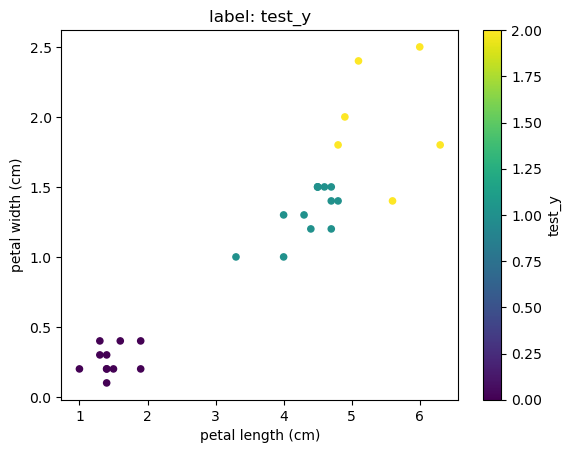

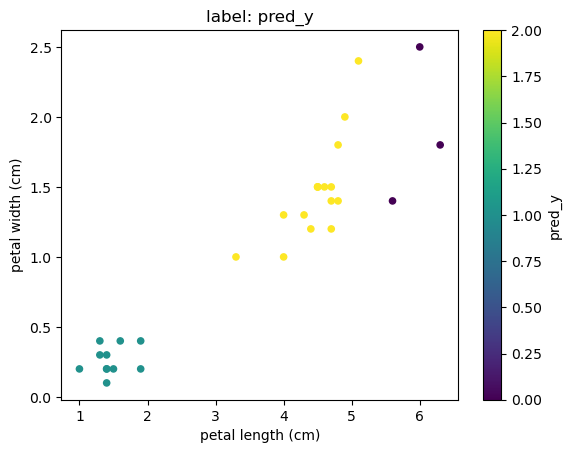

In [4]:
test_x_df = pd.DataFrame(test_x, columns=iris.feature_names)
test_x_df['pred_y'] = pred_y
test_x_df['test_y'] = test_y

import matplotlib.pyplot as plt
test_x_df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='test_y', colormap='viridis')
plt.title('label: test_y')
test_x_df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='pred_y', colormap='viridis')
plt.title('label: pred_y')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 실루엣으로 평가하기

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd 

sil = silhouette_samples(iris_x, iris_y)
sil_y = pd.DataFrame([iris_y, sil], index=['iris_y', 'sil_score'])
sil_y.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
iris_y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
sil_score,0.846469,0.807399,0.822367,0.796877,0.842846,0.736507,0.814515,0.847356,0.742515,0.817477,...,0.531199,0.388713,0.044986,0.548803,0.520693,0.429515,0.099808,0.374301,0.399617,0.053972


In [7]:
sil_y.T.groupby('iris_y')['sil_score'].mean()

iris_y
0.0    0.789381
1.0    0.409085
2.0    0.311966
Name: sil_score, dtype: float64

In [8]:
sil = silhouette_samples(test_x, pred_y)
sil_pred = pd.DataFrame([pred_y, sil], index=['pred_y', 'sil_score'])
sil_pred.T.groupby('pred_y')['sil_score'].mean()

pred_y
0.0    0.207135
1.0    0.794336
2.0    0.453307
Name: sil_score, dtype: float64

## 연습문제
2개로 군집을 나누어서 평가하기

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2, random_state=0)
km.fit(train_x)
pred_y = km.predict(test_x)
sil_2 = silhouette_samples(test_x, pred_y)
sil_2_df = pd.DataFrame([pred_y, sil_2], index=['pred_y', 'sil_score']).T
sil_2_df.groupby('pred_y')['sil_score'].mean()

pred_y
0.0    0.702940
1.0    0.701122
Name: sil_score, dtype: float64

## GMM
가우시안을 기반으로 한 정규분포를 따르는 분류 방법

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

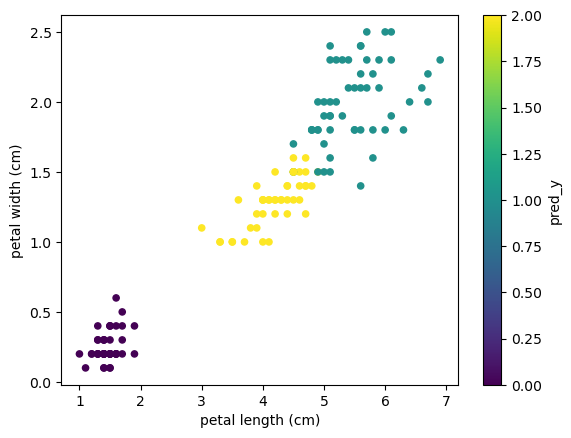

In [10]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(iris.data)
pred_y = gm.predict(iris.data)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['pred_y'] = pred_y

iris_df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='pred_y', colormap='viridis')

In [11]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(iris.data, pred_y)

0.5011761635067206

In [12]:
GMM_score = pd.DataFrame([pred_y, silhouette_samples(iris.data, pred_y)], index=['pred_y', 'score']).T
GMM_score.groupby('pred_y')['score'].mean()

pred_y
0.0    0.784421
1.0    0.302522
2.0    0.429259
Name: score, dtype: float64

In [13]:
GMM_score['score'].mean()

0.5011761635067206

## DBSCAN

원형의 밀집을 구성하는 데이터를 생성하고 평가한다.

(2000, 2) (2000,)


<AxesSubplot:xlabel='f0', ylabel='f1'>

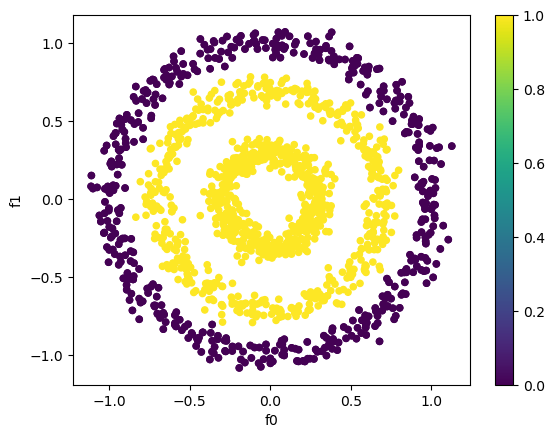

In [14]:
from sklearn.datasets import make_circles
import numpy as np

x1, y1 = make_circles(n_samples=1000, factor=0.7, noise=0.05, shuffle=True, random_state=0)
x2, y2 = make_circles(n_samples=1000, factor=0.3, noise=0.05, shuffle=True, random_state=0)

x = np.vstack([x1, x2])
y = np.hstack([y1, y2])
print(x.shape, y.shape)
df1 = pd.DataFrame(x, columns=['f0', 'f1'])
df1.plot.scatter(x='f0', y='f1', c=y, colormap='viridis')

<AxesSubplot:xlabel='f0', ylabel='f1'>

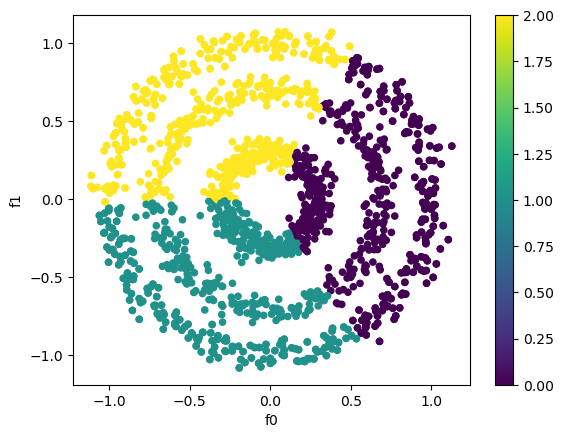

In [15]:
#Kmneas로 예측수행
km = KMeans(n_clusters=3)
km.fit(x)
_y = km.predict(x)
km_df = pd.DataFrame(x, columns=['f0', 'f1'])
km_df.plot.scatter(x='f0', y='f1', c=_y, colormap='viridis')

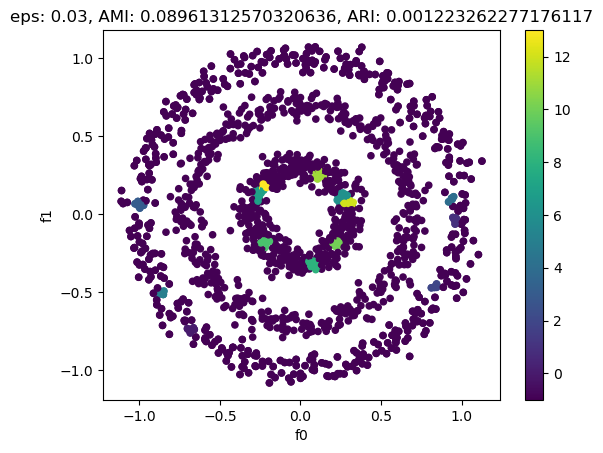

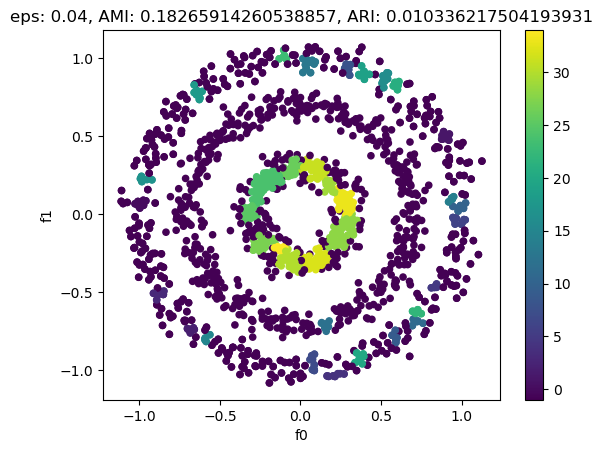

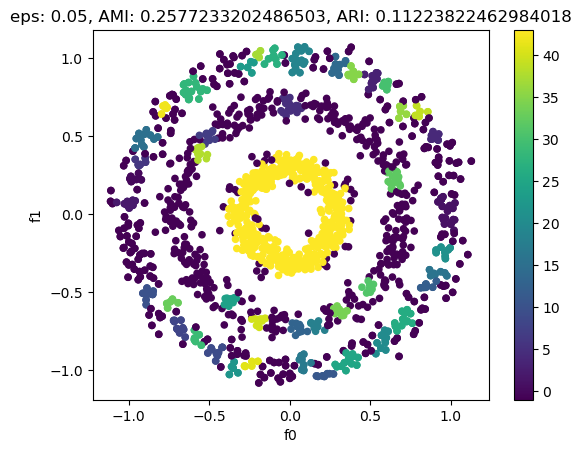

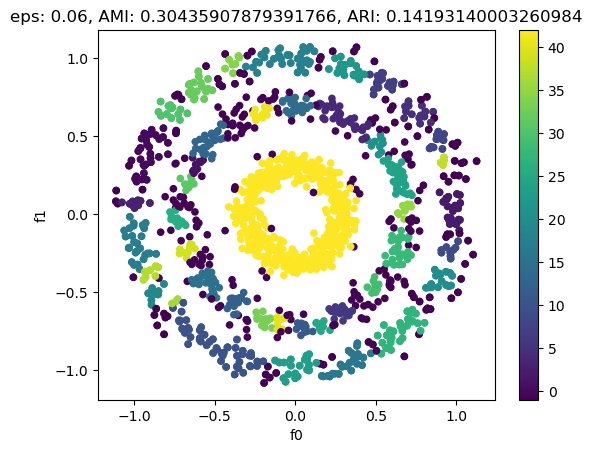

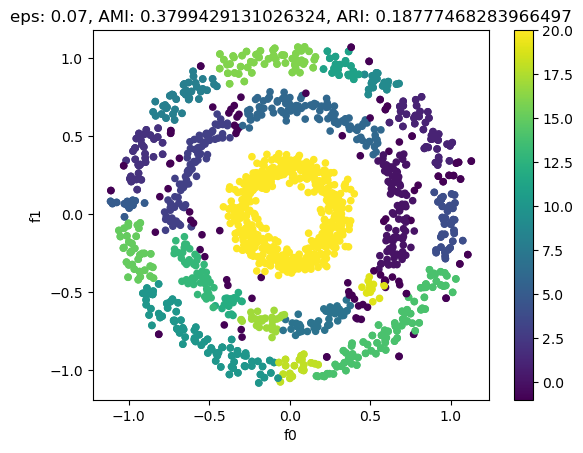

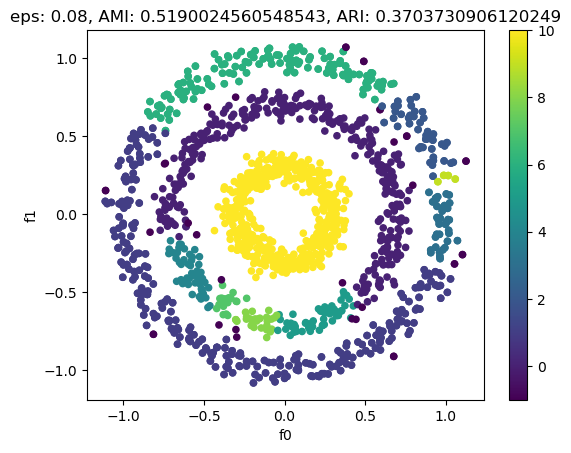

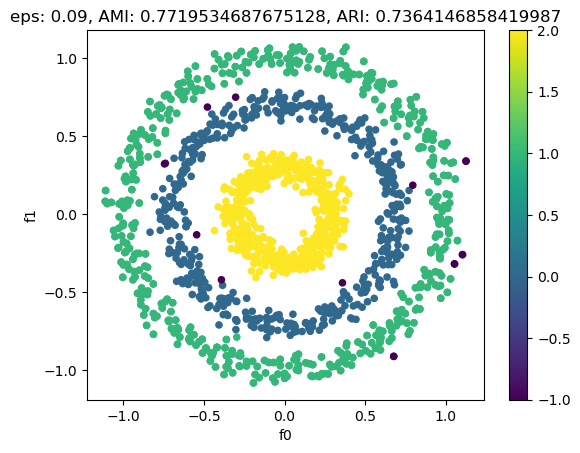

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

for eps in range(1, 10):
    eps *= 0.01
    dbscan = DBSCAN(eps=eps, min_samples=10)
    db_pred = dbscan.fit_predict(x)
    dbscan_df = pd.DataFrame(x, columns=['f0', 'f1'])
    if 2 > len(set(db_pred)):
        continue
    dbscan_df.plot.scatter(x='f0', y='f1', c=db_pred, colormap='viridis')
    AMI = adjusted_mutual_info_score(y, db_pred)
    ARI = adjusted_rand_score(y, db_pred)
    plt.title(f'eps: {eps}, AMI: {AMI}, ARI: {ARI}')